## bezie learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lut = [
    [1],  # n = 0
    [1, 1],  # n = 1
    [1, 2, 1],  # n = 2
    [1, 3, 3, 1],  # n = 3
    [1, 4, 6, 4, 1],  # n = 4
    [1, 5, 10, 10, 5, 1],  # n = 5
    [1, 6, 15, 20, 15, 6, 1],  # n = 6
]

def binomial(n, k):
    while n > len(lut) - 1:
        x = len(lut)
        lut.append([1] + [lut[x - 1][i - 1] + lut[x - 1][i] for i in range(1, x)] + [1])
    return lut[n][k]

def bezier(t, w: list):
    n = len(w) - 1
    result = sum([w[k] * binomial(n, k) * pow(1 - t, n - k) * pow(t, k) for k in range(n + 1)])
    return result


def rational_bezier(t, w: list, r: list):
    n = len(w) - 1
    f = [r[k] * binomial(n, k) * pow(1 - t, n - k) * pow(t, k) for k in range(n + 1)]
    result = sum([f[i] * w[i] for i in range(n + 1)]) / sum(f)
    return result


In [4]:
points = [
    [10, -100],
    [10, -30],
    [50, -10],
    [100, -10],
    [100, -100],
    [10, -100],
]

ratio = [
    0.01,
    0.05,
    0.01,
]

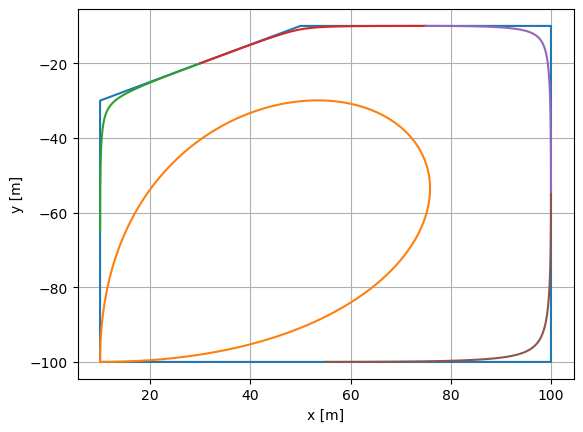

In [31]:
t = np.arange(0.0, 1.001, 0.001)

pointsX = [point[0] for point in points]
pointsY = [point[1] for point in points]
plt.plot([x for x in pointsX], [y for y in pointsY])

bX = [bezier(xt, pointsX) for xt in t]
bY = [bezier(yt, pointsY) for yt in t]
plt.plot(bX, bY)

points2 = [points[0]]

for j in range(len(points) - 1):
    pointA = points[j]
    pointB = points[j + 1]
    pointM = [(pointA[0] + pointB[0]) / 2, (pointA[1] + pointB[1]) / 2]
    points2.append(pointM)
    points2.append(pointB)

for k in range(1, len(points2) - 2, 2):
    pX = [point[0] for point in points2[k: k + 3]]
    pY = [point[1] for point in points2[k: k + 3]]
    rX = [rational_bezier(tn, pX, ratio) for tn in t]
    rY = [rational_bezier(tn, pY, ratio) for tn in t]
    plt.plot(rX, rY)

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(True)

